In [24]:
import re
from random import randint
from collections import defaultdict

import torch
from sklearn.datasets import fetch_20newsgroups

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize


import seaborn as sns
import matplotlib.pyplot as plt

# Data

min: 100
min: 9473
min: 389.6283783783784
voc size: 2812
empty sentences: 0
min: 2
max: 3888
min: 96.83887219374226
amount os sentences: 11314
good sentences: 10301


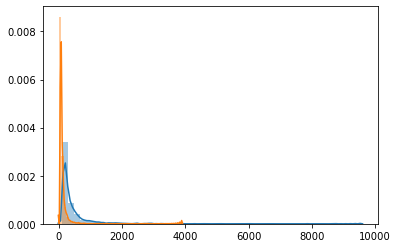

In [25]:
def prepear_data(stop):
    newsgroups_train = fetch_20newsgroups(subset='train')
    sentences = []
    sentences_i = []
    word2idx = {}
    idx2word = {}
    word_counter = defaultdict(int)

    for raw_s in newsgroups_train['data']:
        processed = []
        processed_i = []
        for w in word_tokenize(raw_s.lower()):
            if re.match(r"^[a-zA-Z]+$", w) and w not in stop:
                if w not in word2idx:
                    word2idx[w] = len(word2idx)+1
                    idx2word[word2idx[w]] = w

                word_counter[w] += 1
                processed.append(w)
                processed_i.append(word2idx[w])


        sentences.append(processed)
        sentences_i.append(processed_i)
    
    return sentences, sentences_i, word2idx, idx2word, word_counter
    

stop = set(stopwords.words('english'))
sentences, sentences_i, word2idx, idx2word, word_counter = prepear_data(stop)
for w in [k for k in word_counter if 10000 < word_counter[k] or word_counter[k] < 100]:
    stop.add(w)
sentences, sentences_i, word2idx, idx2word, word_counter = prepear_data(stop)


# check words counters
nums = [word_counter[k] for k in word_counter]
print(f"min: {min(nums)}")
print(f"min: {max(nums)}")
print(f"min: {sum(nums)/len(nums)}")
print(f"voc size: {len(word_counter)}")
sns.distplot(nums)
plt.show()
plt.close()


# check empty sentences
counter = 0
for s in sentences_i:
    if len(s)==0:
        counter += 1
print(f"empty sentences: {counter}")


# check lengths
lengths = [len(s) for s in sentences_i]
print(f"min: {min(lengths)}")
print(f"max: {max(lengths)}")
print(f"min: {sum(lengths)/len(lengths)}")
print(f"amount os sentences: {len(lengths)}")
sns.distplot(lengths)
plt.show()
plt.close()


# fillter medium length sentences
zipped_s = zip(sentences, sentences_i)
good_sentences = []
for s, s_i in zipped_s:
    if len(s) > 10 and len(s)<200:
        good_sentences.append([s, s_i])
print(f"good sentences: {len(good_sentences)}")

# Gensim - prepear word vectors

In [2]:
import gensim
from gensim import corpora

unable to import 'smart_open.gcs', disabling that module


In [3]:
import gensim
from gensim import corpora
from pprint import pprint

# How to create a dictionary from a list of sentences?
documents = ["The Saudis are preparing a report that will acknowledge that", 
             "Saudi journalist Jamal Khashoggi's death was the result of an", 
             "interrogation that went wrong, one that was intended to lead", 
             "to his abduction from Turkey, according to two sources."]

documents_2 = ["One source says the report will likely conclude that", 
                "the operation was carried out without clearance and", 
                "transparency and that those involved will be held", 
                "responsible. One of the sources acknowledged that the", 
                "report is still being prepared and cautioned that", 
                "things could change."]

# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]

# Create dictionary
dictionary = corpora.Dictionary(texts)

# Get information about the dictionary
print(dictionary)

Dictionary(33 unique tokens: ['Saudis', 'The', 'a', 'acknowledge', 'are']...)


In [23]:
len(data)

1701

In [4]:
from gensim.models.word2vec import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api

# Download dataset
dataset = api.load("text8")
data = [d for d in dataset]

# Split the data into 2 parts. Part 2 will be used later to update the model
data_part1 = data[:1000]
data_part2 = data[1000:]

# Train Word2Vec model. Defaults result vector size = 100
model = Word2Vec(data_part1, min_count = 0, workers=cpu_count())

# Get the word vector for given word
model['topic']
#> array([ 0.0512,  0.2555,  0.9393, ... ,-0.5669,  0.6737], dtype=float32)

model.most_similar('topic')
#> [('discussion', 0.7590423822402954),
#>  ('consensus', 0.7253159284591675),
#>  ('discussions', 0.7252693176269531),
#>  ('interpretation', 0.7196053266525269),
#>  ('viewpoint', 0.7053568959236145),
#>  ('speculation', 0.7021505832672119),
#>  ('discourse', 0.7001898884773254),
#>  ('opinions', 0.6993060111999512),
#>  ('focus', 0.6959210634231567),
#>  ('scholarly', 0.6884037256240845)]

# Save and Load Model
model.save('newmodel')
model = Word2Vec.load('newmodel')

[==================================================] 100.0% 31.6/31.6MB downloaded


D:\Python37\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
D:\Python37\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


In [15]:
words = list(model.wv.vocab.keys())

In [17]:
model[words[0]]

D:\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.4693572 ,  0.16573942,  0.6321571 ,  0.18033183,  0.23024836,
        0.04769387, -0.20294072, -0.14887291,  0.15628645, -0.53746074,
       -0.94839203,  0.4006723 ,  0.05611078,  0.37166303, -0.95123637,
       -0.4584396 , -0.18265401, -0.18641753, -1.7252973 , -0.27459747,
        0.84903735, -1.2541428 ,  0.50131816, -0.30883753,  1.1992224 ,
        0.32269648, -0.8226798 , -0.14062193,  0.01268702, -0.81899774,
       -0.24131848,  0.52215475,  1.10018   , -0.40644258, -0.799103  ,
       -0.18906738, -0.99334556, -0.16566505, -1.7233512 , -0.67047596,
        0.91215694, -0.27058432, -0.2712155 ,  0.56400245,  0.5196396 ,
       -0.39248878, -0.81086224,  0.19276704, -1.2013787 , -1.5196918 ,
       -0.3077587 , -0.04925025,  1.3118976 ,  1.0571488 ,  1.1098902 ,
        1.1208178 , -0.53183544,  0.49636286, -0.6295749 ,  0.3324188 ,
       -0.4326501 , -0.14180197, -0.6342511 , -0.31952852,  0.26246393,
        0.22540149,  0.40395063, -0.61883634, -0.87128025, -0.12

In [8]:
model['topic']

D:\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 8.0669302e-01,  7.4509376e-01,  6.2561011e-01,  6.1944568e-01,
        4.4743389e-01,  1.2473942e+00, -1.0893017e-01,  5.2851975e-01,
       -4.3679163e-01, -2.6272682e-02, -3.5963902e-01,  1.0442163e+00,
       -8.4213179e-01,  3.2471570e-01, -1.3577753e+00, -3.5617080e-01,
        2.8453538e-01,  6.8138236e-01, -1.1693423e+00,  5.2097553e-01,
       -1.5301671e-02, -1.4516917e+00,  5.3647840e-01,  4.0520751e-01,
        1.3666022e-01,  1.9710340e-02, -4.6019906e-01,  3.9469126e-01,
        1.8693398e-01, -5.6027842e-01, -4.3873399e-02,  9.9425840e-01,
       -2.2398904e-03, -1.6988477e-01, -1.9249434e+00, -4.8858121e-01,
       -9.5728511e-01, -7.7830825e-04, -1.1235158e+00,  2.4249274e-01,
        6.1912513e-01, -3.8958725e-01,  7.8654331e-01,  2.7274451e-01,
       -7.7405775e-01, -1.2863933e-01, -6.4415777e-01,  3.1884488e-01,
       -8.8206679e-01, -4.6098956e-01, -3.6224189e-01,  1.1373239e+00,
        5.7200009e-01,  6.6850197e-01, -3.7271705e-01,  2.4945411e-01,
      

# Model

In [182]:
from model import ABAE
    
    
# test ABAE model
text = [
    [randint(0,99) for _ in range(randint(10,20))],
    [randint(0,99) for _ in range(randint(10,20))],
    [randint(0,99) for _ in range(randint(10,20))],
    [randint(0,99) for _ in range(randint(10,20))],
    [randint(0,99) for _ in range(randint(10,20))],
    [randint(0,99) for _ in range(randint(10,20))],
    [randint(0,99) for _ in range(randint(10,20))]
]

vocab = set()
for s in text:
    for w in s:
        vocab.add(w)

print(f"sentences: {len(text)}")
print(f"words: {sum([len(s) for s in text])}")
print(f"vocab size: {max(vocab)}")
    
model = ABAE(word_num=max(vocab)+1)
ps = torch.Tensor(text[0]).long()
ns_list = list(map(lambda x: torch.Tensor(x).long(), [text[1], text[2], text[3]]))
rs, ns_list = model(ps, ns_list)

sentences: 7
words: 100
vocab size: 99


# Train

In [313]:
epochs_num = 1
m = 20 # negative_samples
aspects_num=14
emb_size=200
batch_size = 40

In [314]:
model = ABAE(len(word2idx), aspects_num, emb_size)

In [ ]:
# make dataset class for batches

In [ ]:
for epoch_i in range(epochs_num):
    for sample_i in range(len(good_sentences)):
        
        # positive samples
        s, s_i = good_sentences[sample_i]
        
        # get_negative

# Test-Inference

In [ ]:
# get major aspects and major words